# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint



## Learning Objectives

At the end of the experiment,  you will be able to :

* Understand Single Layer Perceptron

In [ ]:
#@title Experiment Explanation Video
from IPython.display import HTML

HTML("""<video width="800" height="300" controls>
  <source src="https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/Walkthrough/Perceptron_Iris.mp4" type="video/mp4">
</video>
""")



## Dataset

#### History

This is a multivariate dataset introduced by R.A.Fisher (Father of Modern Statistics) for showcasing linear discriminant analysis. This is arguably the best known dataset in Feature Selection literature.


The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other. 

#### Description
The Iris dataset consists of 150 data instances. There are 3 classes (Iris Versicolor, Iris Setosa, and Iris Virginica) each has 50 instances. 


For each flower, we have the below data attributes 

- sepal length in cm
- sepal width in cm
- petal length in cm
- petal width in cm


## Domain Information



Iris Plants are flowering plants with showy flowers. They are very popular among movie directors as it gives an excellent background. 

They are predominantly found in dry, semi-desert, or colder rocky mountainous areas in Europe and Asia. They have long, erect flowering stems and can produce white, yellow, orange, pink, purple, lavender, blue, or brown colored flowers. There are 260 to 300 types of iris.

![alt text](https://cdn-images-1.medium.com/max/1275/1*7bnLKsChXq94QjtAiRn40w.png)

As you could see, flowers have 3 sepals and 3 petals.  The sepals are usually spreading or drop downwards and the petals stand upright, partly behind the sepal bases. However, the length and width of the sepals and petals vary for each type.


## AI / ML Technique

A feedforward neural network is an artificial neural network where the connections between units do not form a cycle. Feedforward neural networks were the first type of artificial neural network invented and are simpler than their counterparts. Feedforward travels forward in the network (no loops), first through the input nodes, then through the hidden nodes, and finally through the output nodes. 

### Setup Steps

In [ ]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2100121" #@param {type:"string"}

In [ ]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "5142192291" #@param {type:"string"}

In [ ]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook= "U2W8_05_Perceptron_Iris_C" #name of the notebook

def setup(): 
    ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Experiment_related_data/Iris.csv")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None
    
    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getWalkthrough() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook, "feedback_walkthrough":Walkthrough ,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None
  
  
def getWalkthrough():
  try:
    if not Walkthrough:
      raise NameError
    else:
      return Walkthrough
  except NameError:
    print ("Please answer Walkthrough Question")
    return None
  
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None
  

def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError 
    else: 
      return Answer
  except NameError:
    print ("Please answer Question")
    return None
  

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup() 
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


#### Importing Required Packages

In [ ]:
import pandas as pd
import numpy as np
from pprint import pprint
from sklearn.metrics import accuracy_score

###Load the Data

In [ ]:
# load data using Pandas
iris = pd.read_csv("/content/Iris.csv")
iris.head()

,Id,sepal_length,sepal_width,petal_length,petal_width,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris.shape

(150, 6)

In [ ]:
# Shuffling the data using .sample()
df = iris.sample(frac = 1)
df.head()

,Id,sepal_length,sepal_width,petal_length,petal_width,species
121,122,5.6,2.8,4.9,2.0,Iris-virginica
118,119,7.7,2.6,6.9,2.3,Iris-virginica
128,129,6.4,2.8,5.6,2.1,Iris-virginica
32,33,5.2,4.1,1.5,0.1,Iris-setosa
16,17,5.4,3.9,1.3,0.4,Iris-setosa


### Data pre-processing

1. **species** is our target variable.Drop Iris- virginica from species column. Select Setosa and Iris versicolor as your target varaible.

2. Converting categorical values to numerical values where species contain categorical values such as 'Iris-setosa', 'Iris-virginica' and replacing them with with 1, 0


In [ ]:
df.drop('Id',axis = 1,inplace = True)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
121,5.6,2.8,4.9,2.0,Iris-virginica
118,7.7,2.6,6.9,2.3,Iris-virginica
128,6.4,2.8,5.6,2.1,Iris-virginica
32,5.2,4.1,1.5,0.1,Iris-setosa
16,5.4,3.9,1.3,0.4,Iris-setosa


In [ ]:
df = df[df['species'] != 'Iris-virginica']

df['species'].replace(to_replace = ['Iris-setosa', 'Iris-versicolor'], value = [1, 0], inplace = True)

In [ ]:
df.loc[[5, 60, 90]]  #select few samples to see the DataFrame

,sepal_length,sepal_width,petal_length,petal_width,species
5,5.4,3.9,1.7,0.4,1
60,5.0,2.0,3.5,1.0,0
90,5.5,2.6,4.4,1.2,0


### Single Layer Perceptron

A node, also called a neuron or Perceptron, is a computational unit that has one or more weighted input connections. Use a transfer function that combines the inputs and gives the output connection. Nodes are then organized into layers to comprise a network.

Let us see how the output is measured at each neuron

![alt text](https://cdn.talentsprint.com/aiml/Experiment_related_data/artificial_neuron.png)

In [ ]:
import numpy as np

def sigmoid(x, derive=False):
    if derive:
        return x * (1 - x)
    return 1 / (1 + np.exp(-x))


### Part-A: Understand Perceptron using mathematical approach

#### Performing for only one sample

In [ ]:
# Let us take 5th sample as input x1, x2, x3, x4
one_neuron_inputs  = [7.0, 3.2, 4.7, 1.4] #[5.4, 3.9,	1.7, 0.4] 
weights = [0.7, 0.6, -1.0, -1.0] # [0.7, 0.6, -1.0, -1.0] # You can give the random weights w1, w2, w3, w4

In [ ]:
#This function returns the sum of product of inputs and weights
def weighted_sum(inputs, weights):
    total = 0
    for inputs_value,weight in zip(inputs, weights):
        total += inputs_value * weight
    return total

In [ ]:
# Output of first neuron
Node_input = weighted_sum(one_neuron_inputs, weights)
print("Output of first neuron", Node_input)

Output of first neuron 0.7199999999999993


In [ ]:
# Initialize the weights with random numbers
inputs = [4,5,2]
w11 = [1,2,2]
w12 = [4,1,1]
w21 = 2
w22 = 1
# output of first new neuron
n_input1 = weighted_sum(inputs, w11) 
print("outPut nerourn1 ",n_input1)
# output of second new neuron
n_input2 = weighted_sum(inputs, w12) 
print("outPut nerourn2 ",n_input2)
# output of first new neuron on second weights
n_input11 =  (n_input1 * w21) 
print("outPut nerourn11 ",n_input11)
# output of second new neuron on second weights
n_input22 = (n_input2 * w22) 
print("outPut nerourn22 ",n_input22)
sum_n1_2 = n_input11 + n_input22
print('Summation is ', sum_n1_2)

def sigmoid(x, derive=False):
    if derive:
        return x * (1 - x)
    return 1 / (1 + np.exp(-x))

print("Output value after applied sigmoid ", sigmoid(sum_n1_2))

outPut nerourn1  18
outPut nerourn2  23
outPut nerourn11  36
outPut nerourn22  23
Summation is  59
Output value after applied sigmoid  1.0


In [ ]:
x1 = 4*1+5*2+2*2 
x2 = 4 * 4 + 5 * 1 + 2 * 1 
x1_2 = x1 *2 
x3 = x1_2 + x2
x3

59

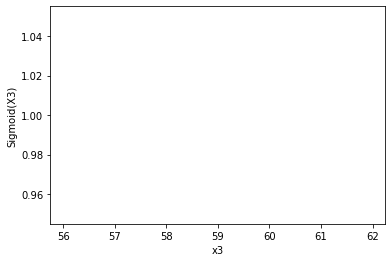

1.0


In [ ]:
import matplotlib.pyplot as plt 
import numpy as np 
import math 
  
z = 1/(1 + np.exp(-x3)) 
  
plt.plot(x3, z) 
plt.xlabel("x3") 
plt.ylabel("Sigmoid(X3)") 

plt.show() 
print(z)

In [ ]:
4^3-3*4^2-24*4+46

35

In [ ]:
-2^3-3*-2^2-24*-2+46

-105

**Step Function**


A Step Function is one of the most common activation function in neural networks. The function produces binary output.

The output is a certain value, $A_1$, if the input sum is above a certain threshold and $A_0$ if the input sum is below a certain threshold. The values used by the Perceptron were $A_1$ = 1 and $A_0$ = 0.

![alt text](https://cdn.talentsprint.com/aiml/Experiment_related_data/step_function.png)

These kinds of step activation functions are useful for binary classification schemes. In other words, when we want to classify an input pattern into one of two groups, we can use a binary classifier with a step activation function. Another use for this would be to create a set of small feature identifiers. Each identifier would be a small network that would output a 1 if a particular input feature is present, and a 0 otherwise. Combining multiple feature detectors into a single network would allow a very complicated clustering or classification problem to be solved.

In [ ]:
def Step_Fun(number):
    if number >= 2: # Threshold value is 2
        return 1
    else:
        return 0

In [ ]:
# Apply the step function where it returns one if node input value is greater than or equal to 2, otherwise returns zero
Node_output = Step_Fun(Node_input)
print(Node_output)

0


#### Performing for all samples

Performing weigthed sum  and Step function for each of the feature by taking random weights and finding accuracy for actuals and predictions. 

In [ ]:
samples = df.iloc[:, :4].values
predicted = []
weights = [0.7, 0.6, -1.0, -1.0] # Change the weights and observe the change in accuracy
for sample in samples:
  Node_input = weighted_sum(sample, weights)
  Node_output = Step_Fun(Node_input)
  predicted.append(Node_output)

actual = df.iloc[:, 4].values
print("Actual labels from the data", actual)
print("\n Predicted labels", predicted)

acc = accuracy_score(actual, predicted)
print("Accuracy of the Perceptron using mathematical approach", acc)

Actual labels from the data [1 1 0 1 1 0 1 0 0 1 1 1 0 1 1 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0 1
 1 0 0 1 0 0 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 0
 0 1 0 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1 1 0 0 0 1]

 Predicted labels [1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1]
Accuracy of the Perceptron using mathematical approach 1.0


### Part- B: Perceptron from Sklearn

1. From the given data, Select features and labels
2. Split the data into train and test sets 
3. Train using perceptron Classifier

In [ ]:
labels = df['species']
features = df.drop('species', axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(features, labels, test_size = 0.2)

In [ ]:
from sklearn.linear_model import Perceptron
model = Perceptron() 
# Fitting the data into the model
model.fit(xtrain, ytrain)
# Predicting the labels for test data
accuracy = model.score(xtest, ytest)
print("Accuracy of the Perceptron using sklearn", accuracy)

Accuracy of the Perceptron using sklearn 1.0


### Please answer the questions below to complete the experiment:

In [ ]:
#@title  What is the output of the neuron with inputs [7.0,  3.2, 4.7, 1.4] and weights [0.7, 0.6, -1.0, -1.0] ? { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "0" #@param ["","0", "1"]


In [ ]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good, But Not Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [ ]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "none" #@param {type:"string"}


In [ ]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [ ]:
#@title  Experiment walkthrough video? { run: "auto", vertical-output: true, display-mode: "form" }
Walkthrough = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 7234
Date of submission:  11 Oct 2020
Time of submission:  17:47:20
View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions
